                       id  Taxpayer ID                         Taxpayer Name  \
0      111371519470000259  11137151947               SHANE ENTERPRISES, INC.   
1      103052510340003859  10305251034                 KUIFS PETROLEUM, L.P.   
2      120186788590000109  12018678859                 AMITY ENTERPRISES LLC   
3      103052510340004109  10305251034                 KUIFS PETROLEUM, L.P.   
4      103047941250000359  10304794125                      BAWA CORPORATION   
...                   ...          ...                                   ...   
59396  352952952950000209  35295295295  HEALTH AND HUMAN SERVICES COMMISSION   
59397  390000128880000109  39000012888                         JUAN A PORRAS   
59398  390000159640000109  39000015964                      BENNIE L MCGRIFF   
59399  390000956690000109  39000095669                        JOHN ALIHEMATI   
59400  390001477340001009  39000147734                HERLINDA MENCIA VARELA   

                        Location Name  

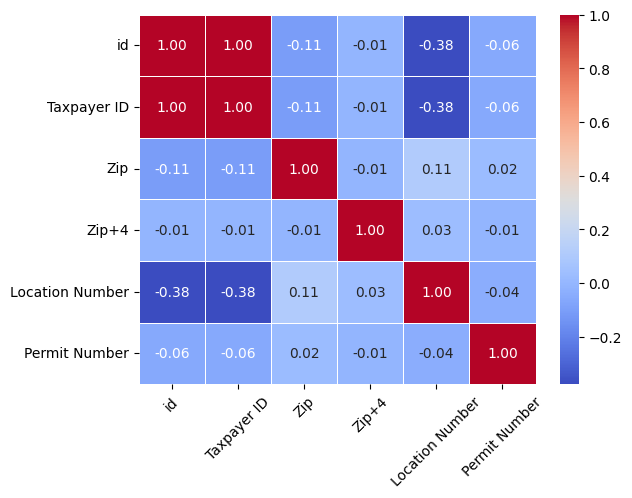

                           id   Taxpayer ID           Zip         Zip+4  \
id               5.400557e+33  5.400557e+26 -1.203665e+19 -1.755656e+18   
Taxpayer ID      5.400557e+26  5.400557e+19 -1.203665e+12 -1.755656e+11   
Zip             -1.203665e+19 -1.203665e+12  2.362611e+06 -2.162502e+04   
Zip+4           -1.755656e+18 -1.755656e+11 -2.162502e+04  4.583727e+06   
Location Number -2.031566e+19 -2.031566e+12  1.212771e+05  4.547542e+04   
Permit Number   -5.908132e+22 -5.908132e+15  4.662520e+08 -1.784205e+08   

                 Location Number  Permit Number  
id                 -2.031566e+19  -5.908132e+22  
Taxpayer ID        -2.031566e+12  -5.908132e+15  
Zip                 1.212771e+05   4.662520e+08  
Zip+4               4.547542e+04  -1.784205e+08  
Location Number     5.363282e+05  -4.528201e+08  
Permit Number      -4.528201e+08   2.090256e+14  
############
id                 1.752034e+17
Taxpayer ID        1.752034e+10
Zip                7.606700e+04
Zip+4          

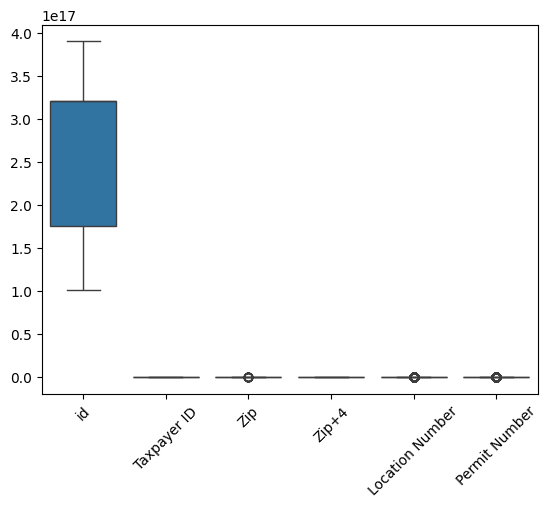

id                    0
Taxpayer ID           0
Zip                   7
Zip+4                 0
Location Number    2029
Permit Number      1915
dtype: int64
############


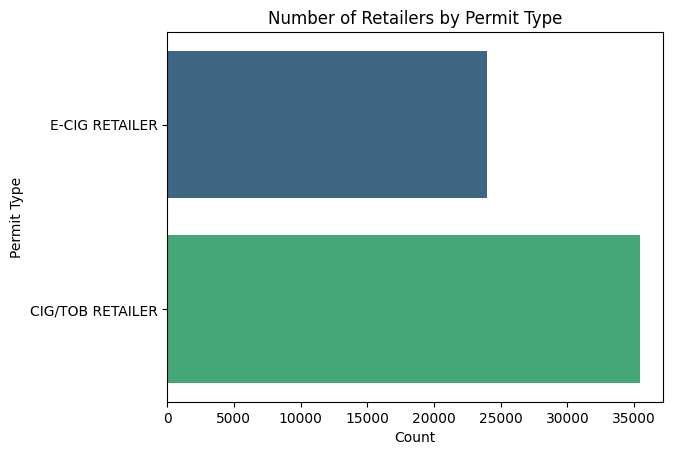

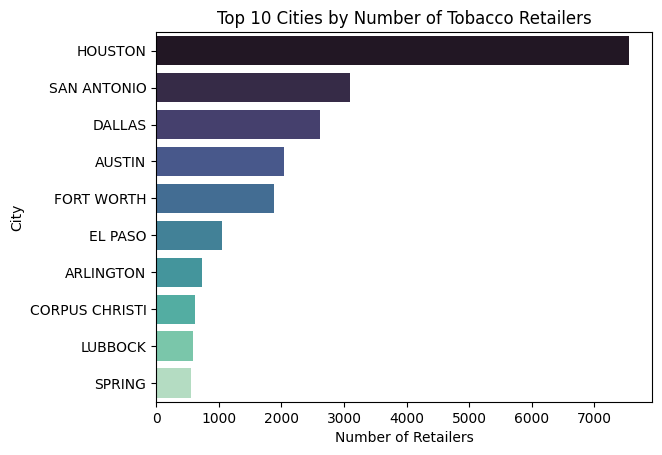

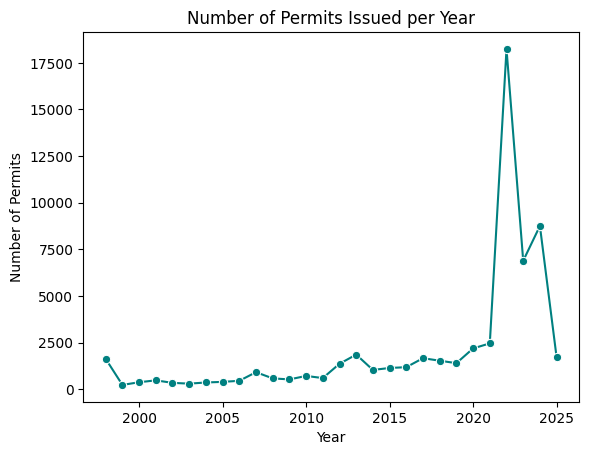

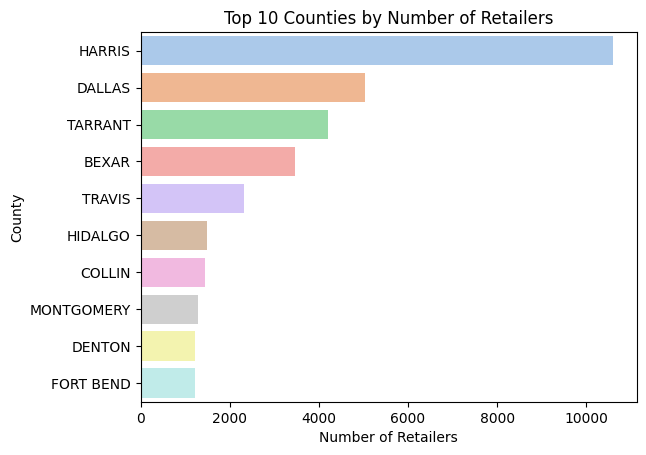

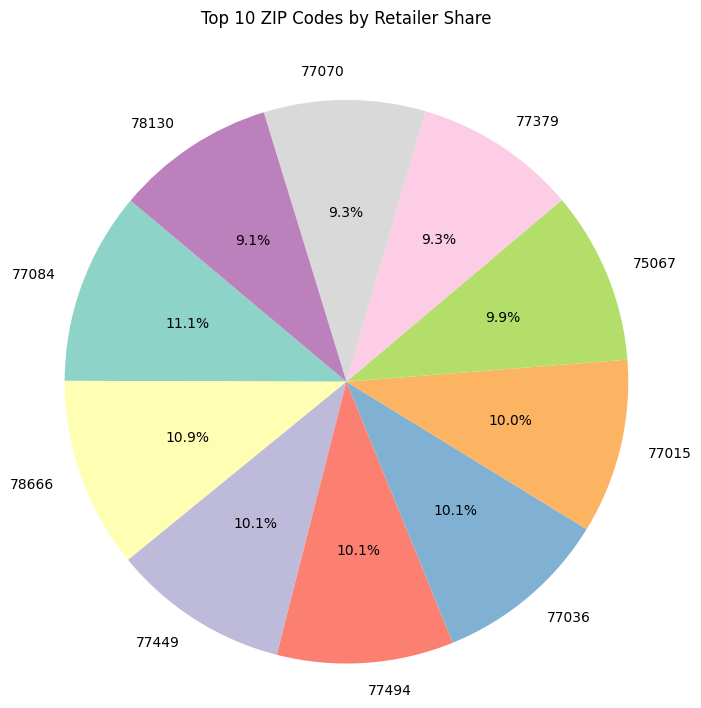

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as cb
from scipy import stats as st

df=pd.read_csv("/content/drive/MyDrive/Active_Cigarette_Tobacco_Retailers.csv")
print(df)
print("############")



#knowing the data
print(df.head())
print("############")
print(df.describe())
print("############")
print(df.info())
print("############")
print(df.nunique())
print("############")
print(df.columns)
print("############")




#handling missing data
print(df.isnull().sum())
print("############")
print(df.dropna())
print("############")




#correlation
corre=df.corr(numeric_only=True)
print(corre)
print("############")
cb.heatmap(corre,cmap="coolwarm",annot=True,linewidths=0.5,fmt=".2f")
plt.xticks(rotation=45)
plt.show()





#covariance
cov=df.cov(numeric_only=True)
print(cov)
print("############")



#outliers
num=df.select_dtypes(include=['number']).columns
q1=df[num].quantile(0.25)#25% of your data
print(q1)
print("############")
q3=df[num].quantile(0.75)
print(q3)
print("############")
iqr=q3-q1
print(iqr)
print("##########")
lb=q1-1.5*iqr
print(lb)
print("############")
ub=q3+1.5*iqr
print(ub)
print("############")
out=(df[(df[num]<lb)|(df[num]>ub)]).sum()#sum of outliers in each column
print(out)
print("############")
cb.boxplot(df[num])
plt.xticks(rotation=45)
plt.show()
score=st.zscore(df[num],nan_policy='omit')#zscore is used to find the outliers in the data
out1=(abs(score>3)).sum(axis=0)#sum of outliers in each column
print(out1)
print("############")





#Objective 1: Number of Retailers by Permit Type (Bar Plot)
#Goal: Show how many businesses are registered as 'E-CIG RETAILER' vs' CIG/TOB RETAILER.'
cb.countplot(y="Permit Type",hue="Permit Type", data=df, palette="viridis", legend=False)
plt.title("Number of Retailers by Permit Type")
plt.xlabel("Count")
plt.ylabel("Permit Type")
plt.show()




#Objective 2: Top 10 Cities with Most Tobacco Retailers (Bar Plot)
#Goal: Identify cities with the highest number of licensed retailers.
top_cities = df['City'].value_counts().nlargest(10)
cb.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette="mako", legend=False)
plt.title("Top 10 Cities by Number of Tobacco Retailers")
plt.xlabel("Number of Retailers")
plt.ylabel("City")
plt.show()




#Objective 3: Permit Trends Over Time (Line Plot)
#Goal: Analyze how many permits started each year.
df['Permit Begin Date'] = pd.to_datetime(df['Permit Begin Date'], errors='coerce')
df['Permit Year'] = df['Permit Begin Date'].dt.year

permits_by_year = df['Permit Year'].value_counts().sort_index()
cb.lineplot(x=permits_by_year.index, y=permits_by_year.values, marker="o", color="teal")
plt.title("Number of Permits Issued per Year")
plt.xlabel("Year")
plt.ylabel("Number of Permits")
plt.show()




#Objective 4: Retailers by County (Top 10) (Bar Plot)
#Goal: Visualize which counties have the most tobacco retailers.
top_counties = df['County'].value_counts().nlargest(10)
cb.barplot(x=top_counties.values, y=top_counties.index, hue=top_counties.index, palette="pastel", legend=False)
plt.title("Top 10 Counties by Number of Retailers")
plt.xlabel("Number of Retailers")
plt.ylabel("County")
plt.show()




#Objective 5: Top 10 ZIP Codes by Share of Retailers (Pie Chart)
#Goal: Show the distribution of tobacco retailers among the top 10 ZIP codes by count, emphasizing their share of the total.
top_zips = df['Zip'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_zips.values, labels=top_zips.index.astype(str), autopct='%1.1f%%', startangle=140, colors=cb.color_palette("Set3"))
plt.title("Top 10 ZIP Codes by Retailer Share\n\n")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Filter for two permit types
df = df[df['Permit Type'].isin(['E-CIG RETAILER', 'CIG/TOB RETAILER'])]
df['Permit Type Binary'] = df['Permit Type'].map({'E-CIG RETAILER': 0, 'CIG/TOB RETAILER': 1})

# Features and target
X = df[['City', 'County', 'Zip']]
y = df['Permit Type Binary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing and model pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['City', 'County']),
        ('num', 'passthrough', ['Zip'])
    ])),
    ('model', LogisticRegression(max_iter=1000))
])

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.5994
